# Setting

## path setting 

In [1]:
### for local machine ###
import sys, os
home_path = os.path.expanduser("~") + '/Desktop/Molecular_kaggle'
sys.path.append(home_path + '/py/')

In [2]:
### for kaggle kernel ###
import sys
sys.path.append('../usr/lib/boosting/')
sys.path.append('../usr/lib/based/')

## import module and my function

In [15]:
# module
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import scipy
# import pyper
import lightgbm
import xgboost
from tabulate import tabulate
# from ggplot import *
import warnings
import collections
from scipy.optimize import minimize
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #seabornライブラリを読み込み、スタイルをセットする
from numpy import linalg as la
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

# my module 
import importlib
import boosting
import based
importlib.reload(boosting)
importlib.reload(based)

# for instance
Process = based.Process()
Assistance = based.Assistance()
LightGBM = boosting.LightGBM()

## Read csv

In [4]:
### for local machine ###
train_df, test_df, features = Process.read_data()

# under sampling for testing
train_df = Assistance.test_sampling(train=train_df, key='type', rate=0.2)
train_df.head()

4664880 observations and 22 features in train set.
2509265 observations and 22 features in test set.
6 observations and 1 features in features set.


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,via_number,atom_0,x_0,y_0,...,atom_1,x_1,y_1,z_1,radius_1,distance,distance_x,distance_y,distance_z,path_distance
0,1185565,dsgdb9nsd_039458,15,6,1JHC,110.1160,1,H,0.286267,-2.222420,...,C,0.477427,-1.552416,1.767878,0.77,1.099142,0.191159,0.670004,0.850098,NaN
1,3534157,dsgdb9nsd_101694,20,6,1JHC,80.8758,1,H,-1.414847,-0.713900,...,C,-1.792551,-1.252206,-2.291178,0.77,1.095536,0.377704,0.538306,0.876222,NaN
2,1991021,dsgdb9nsd_062991,17,4,1JHC,108.5490,1,H,2.563699,0.683749,...,C,2.195676,-0.266318,-1.235141,0.77,1.085543,0.368022,0.950068,0.374614,NaN
3,1544790,dsgdb9nsd_050197,10,2,1JHC,78.5597,1,H,2.154628,1.081770,...,C,1.396284,1.876703,0.217280,0.77,1.098760,0.758344,0.794933,0.016441,NaN
4,3967977,dsgdb9nsd_112122,15,5,1JHC,83.1419,1,H,2.225070,-3.796169,...,C,1.939975,-3.106696,-0.373471,0.77,1.101212,0.285095,0.689473,0.809948,NaN


In [ ]:
### for Kaggle kernel ###
train_df = pd.read_csv("../input/preprocess/train.csv")
test_df = pd.read_csv('../input/preprocess/test.csv')
features = pd.read_csv('../input/preprocess/features.csv')

# check data frame
print("{} observations and {} features in train set.".format(train_df.shape[0],train_df.shape[1]))
print("{} observations and {} features in test set.".format(test_df.shape[0],test_df.shape[1]))
print("{} observations and {} features in features set.".format(features.shape[0],features.shape[1]))

features = features["feature"].tolist() # features list

# LightGBM

- lightgbm

## model execute

In [16]:
# parameters
param_lgb = {'metric': 'mae', # 評価関数
                     'objective':'regression_l2', # 目的関数
                     'max_depth': -1, # 各木の最大の深さ
                     'max_leaves': 255, # 各木の最大の葉の数
                     'min_data_in_leaf': 20, # 末端ノードに含まれる最小ノード数 (default)
                     'learning_rate': 0.15, # 各木の重み係数 (大きいと少ない木で予測する)
                     'boosting': 'gbdt', # (dart, rf)
                     'bagging_freq': 1, # バギングを行う割合 (1:常に行う, 0: 行わない)
                     'sub_feature':0.5, # 訓練データの??%を利用 (特徴量)
                     'sub_row':0.75, # 訓練データの??%を利用 (データ, 非復元抽出)
                     'verbosity': -1,
                     'nthread': 4,
                     'random_state': 831}

# argument
arg_dict = {'train' : train_df,
                 'test' : test_df,
                 'features' : features,
                 'param' : param_lgb,
                 'name' : 'Lightgbm base model'}

In [17]:
# model
with based.timer("Light GBM model"):
        mean_log_mae, submit_file, importance = \
        Assistance.split_execute_model(split_value = 'type',
                                                         train=train_df, 
                                                         test=test_df, 
                                                         model=LightGBM.lightgbm, 
                                                         model_arg = arg_dict)

~~~~~~~~~ type name: 1JHC  ~~~~~~~~~
validation method: GroupKFold(n_splits=5) groups value: molecule_name
fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.84903	valid_1's l1: 5.33875
Early stopping, best iteration is:
[59]	training's l1: 4.95374	valid_1's l1: 5.3106
fold n°2
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.85022	valid_1's l1: 5.2876
Early stopping, best iteration is:
[69]	training's l1: 4.92444	valid_1's l1: 5.26846
fold n°3
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.83863	valid_1's l1: 5.31929
Early stopping, best iteration is:
[61]	training's l1: 4.93828	valid_1's l1: 5.29465
fold n°4
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 4.8415	valid_1's l1: 5.34211
Early stopping, best iteration is:
[59]	training's l1: 4.9488	valid_1's l1: 5.30634
fold n°5
Training until validation scores don't improve for 100 r

[100]	training's l1: 1.0092	valid_1's l1: 1.18544
[200]	training's l1: 0.901378	valid_1's l1: 1.15973
[300]	training's l1: 0.843825	valid_1's l1: 1.16691
Early stopping, best iteration is:
[227]	training's l1: 0.883115	valid_1's l1: 1.15778
fold n°4
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0113	valid_1's l1: 1.1771
[200]	training's l1: 0.902953	valid_1's l1: 1.14995
Early stopping, best iteration is:
[185]	training's l1: 0.913283	valid_1's l1: 1.1489
fold n°5
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.01611	valid_1's l1: 1.17048
[200]	training's l1: 0.908702	valid_1's l1: 1.13658
[300]	training's l1: 0.850979	valid_1's l1: 1.14106
Early stopping, best iteration is:
[227]	training's l1: 0.890715	valid_1's l1: 1.13494
~~~~~~~~~ type name: 3JHN  ~~~~~~~~~
validation method: GroupKFold(n_splits=5) groups value: molecule_name
fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	t

## Result

In [22]:
# result (Mean Log MAE)
print(mean_log_mae)
print("Lightgbm normal validation Mean log MAE: %.4f" % np.mean(mean_log_mae["log_mae"]))
# submit
# Process.submit(submit_file ,tech = "lightgbm_giba_output")

 split_value   log_mae
        1JHC  1.664506
        1JHN  1.178785
        2JHC  0.678396
        2JHH  0.033855
        2JHN  0.472895
        3JHC  0.552386
        3JHH  0.135305
        3JHN -0.374150
Lightgbm normal validation Mean log MAE: 0.5427


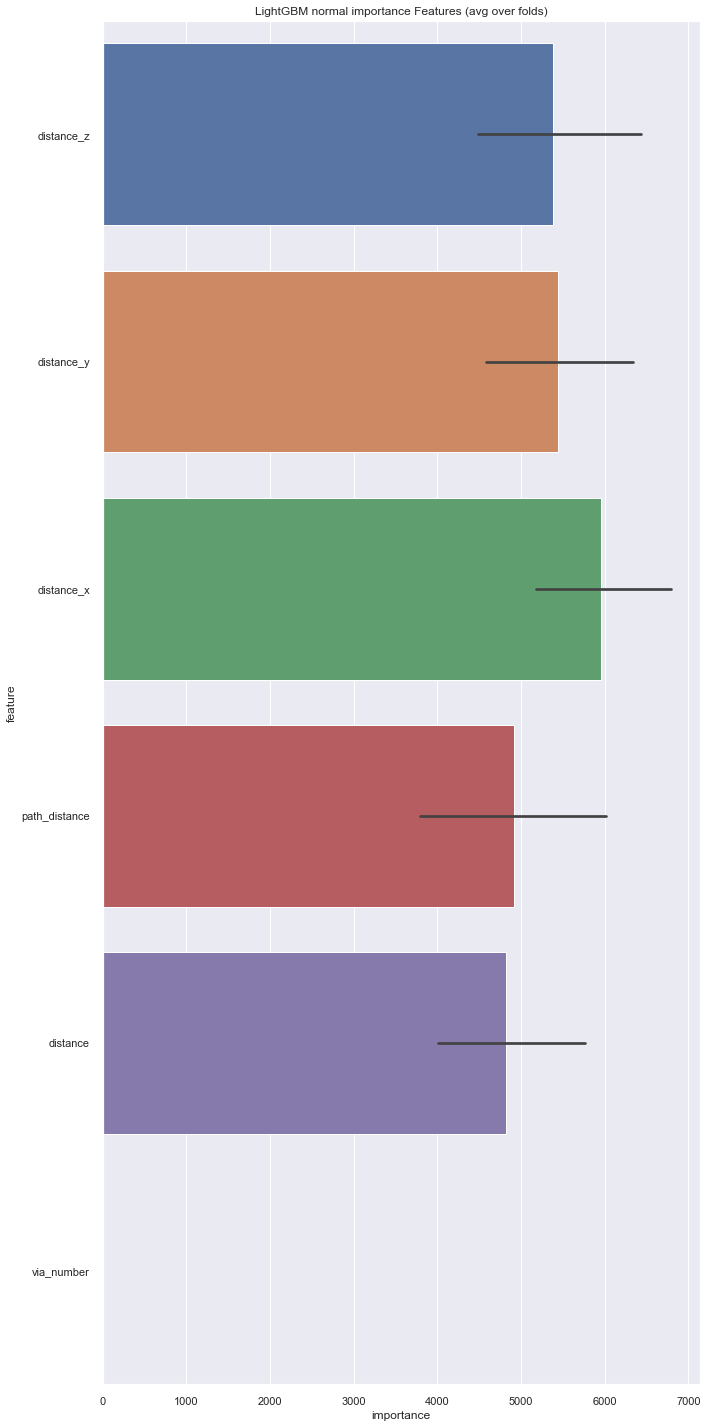

In [23]:
# importance  
Process.display_importances(importance,title="LightGBM normal importance",file_name = None)

In [ ]:
# output file
file_name =  'lightgbm_sample' + '_' + datetime.now().strftime("%Y%m%d") + ".csv"
submit_file.to_csv(file_name, index=False)